# FAQS

## Setting Up Your Authentication Token for Nixtla SDK

### What is a token?

A token is a unique string of characters that serves as a key to authenticate your requests when using the Nixtla SDK. It ensures that the person making the requests is allowed to do so.

### How do I use my token with Nixtla SDK?

Nixtla will provide you with a personal token upon registration or via your account settings. To integrate this token into your development workflow with the Nixtla SDK, you have two primary methods:

1. **Direct Copy and Paste:**
   - **Step 1:** Copy the token provided to you by Nixtla.
   - **Step 2:** Instantiate the `TimeGPT` class by directly pasting your token into the code, as shown below:

In [ ]:
from nixtlats import TimeGPT
timegpt = TimeGPT(token='paste your token here')

This approach is straightforward and best for quick tests or scripts that won't be shared.

2. **Using an Environment Variable:**
   
   - **Step 1:** Store your token in an environment variable named `TIMEGPT_TOKEN`. This can be done for a session or permanently, depending on your preference.

   - **Step 2:**
     When you instantiate the `TimeGPT` class, it will automatically look for the `TIMEGPT_TOKEN` environment variable.

In [ ]:
#| hide
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from nixtlats import TimeGPT
timegpt = TimeGPT()

   There are several ways to set an environment variable:

   - **From the Terminal:** Use the export command to set the `TIMEGPT_TOKEN`.

``` bash
export TIMEGPT_TOKEN=your_token
```

   - **Using a `.env` File:** For a more persistent solution that can be version-controlled if private, or for ease of use across different projects, place your token in a `.env` file.

``` bash
# Inside a file named .env
TIMEGPT_TOKEN=your_token
```

   - **Within Python:** If using a `.env` file, you can load the environment variable within your Python script. Use the `dotenv` package to load the `.env` file, then instantiate the `TimeGPT` class.

In [ ]:
from dotenv import load_dotenv

load_dotenv()
from nixtlats import TimeGPT
timegpt = TimeGPT()

   This approach is more secure and suitable for applications that will be deployed or shared, as it keeps tokens out of the source code.

Remember, your token is like a password - keep it secret, keep it safe!

### How can I validate my token? 

If you want to ensure your token is valid, you can use the `validate_token` method of the `TimeGPT` class. This method will return `True` if the token is valid and `False` if it's not. 

In [ ]:
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

You don't need to validate your token every time you use `TimeGPT`. This function is provided for convenience to ensure that your token has been set up correctly. You can check your token on your dashboard under `API Keys`.

## Long Horizon in Time Series

When managing long horizon forecasting tasks in time series analysis, understanding the data's frequency and seasonality is crucial. Seasonality refers to periodic fluctuations in time series data that occur at regular intervals, like daily, weekly, or annually. 

### What is Long Horizon? 

- **Definition**:
  A "long horizon" in time series forecasting refers to predictions that extend beyond the range of one or two seasonal
  cycles. The exact definition depends on the data's frequency and inherent seasonality. For example, with daily data that
  shows weekly seasonality (7 days), forecasting beyond two weeks would typically be considered a long horizon.

- **Challenges**:
  Forecasting over a long horizon is challenging due to the increased uncertainty and the potential influence of many more
  unknown factors as the forecast period extends. Also, the further out the forecast, the more likely it is that the seasonal
  patterns may change or be influenced by other factors.

### How do I use `TimeGPT` for Long Horizon tasks?

To effectively forecast long horizons, especially when you need to predict more than two seasonal cycles, it's recommended to use specialized models. The `TimeGPT` model in the Nixtla SDK is designed to handle these kinds of tasks:

- **Model Selection**:
  Choose the appropriate model variant designed for long horizons. For the Nixtla SDK, this is done by setting the `model`
  parameter to `'timegpt-1-long-horizon'`.

- **Forecasting**:
  Use the `forecast` method to predict the future values of your time series. You can specify the number of periods to
  forecast (`h`) corresponding to your long-horizon needs.

Here's how you can implement it:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
from nixtlats import TimeGPT
timegpt = TimeGPT()

# df is your time series dataframe
# h is the forecast horizon
# 'timegpt-1-long-horizon' is the model variant for long horizon forecasting
fcst_df = timegpt.forecast(df=df, h=36, model='timegpt-1-long-horizon', time_col='timestamp', target_col='value')

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: MS
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


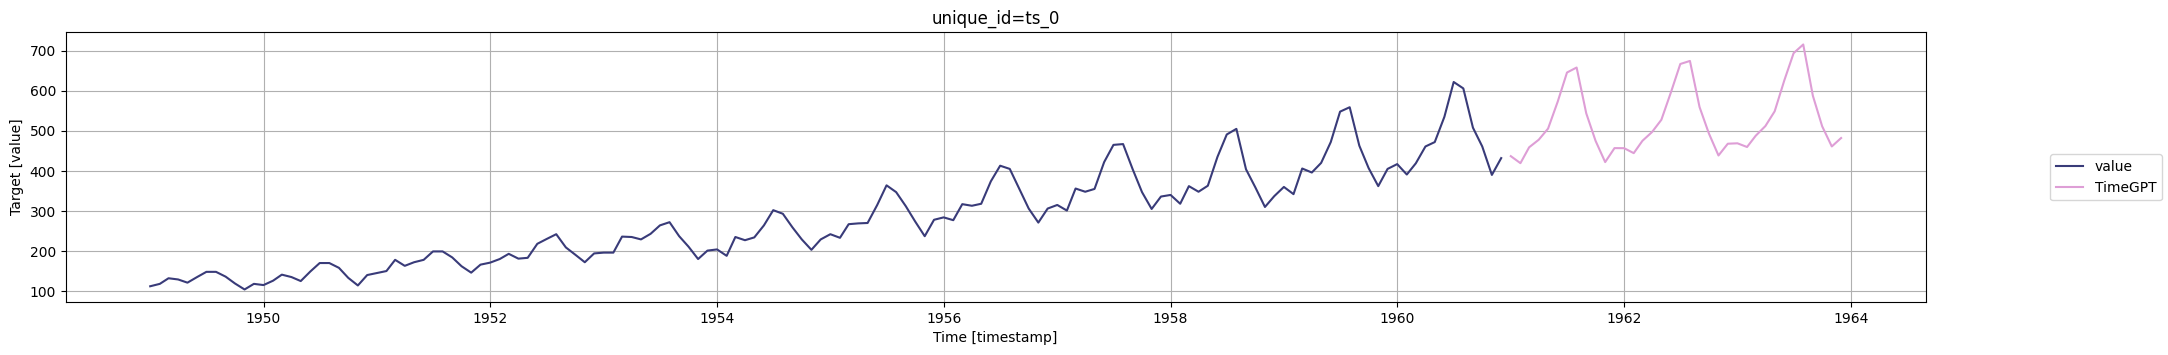

In [ ]:
timegpt.plot(df, fcst_df, time_col='timestamp', target_col='value')

**The model argument is also supported by `TimeGPT.cross_validation` and `TimeGPT.detect_anomalies`.**

In this example, `df` is your time series data frame, `h=36` would be forecasting for three years ahead, assuming a monthly frequency with a yearly seasonality, which qualifies as a long horizon forecast.

It's important to note that while the `TimeGPT` model is designed to handle long horizon tasks, the quality of the forecast can still depend on several factors, including data quality, inherent noise in the data, and any external factors that might influence the trend or seasonality over time.

## Exogenous variables

Exogenous variables are external factors that can influence the target variable you are forecasting in a time series model. In the context of the SDK you're using, these exogenous variables are included in the forecasting model to improve the accuracy
of the predictions. 

Here's a detailed explanation of how to incorporate exogenous variables in the SDK:

### How do I use Exogenous Variables in the SDK?

1. **Prepare Your Data:**
   Ensure that your main dataframe (`df`) contains the historical data including the target variable (`y`) and all exogenous
   variables that align with the temporal component (`ds`). These exogenous variables (`Exogenous1`, `Exogenous2`, etc.)
   represent the known values up to the current date.

3. **Forecasting with Exogenous Variables:**
   To forecast future values, you must also provide the future values of these exogenous variables. This is done with a
   separate dataframe (`X_df`), which contains the future timestamps and the expected values of the exogenous variables for
   those times.

The following image shows graphically the distinction between `df` and `X_df`. `df` must include all the information (historical values of the target variable given by `Historical y` in the plot and the exogenous variables: `Historical Exogenous 1`, and `Historical Exogenous 2`) before the `Forecast Starting Point` given by the vertical black line. Since we want to generate forecasts for `Historical y` (i.e. to fill in the bottom-right part of the plot), we need the future values of the exogenous variables (`Future Exogenous 1`, and `Future Exogenous 2`). That information must be included in `X_df`. 

In [ ]:
#| hide
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

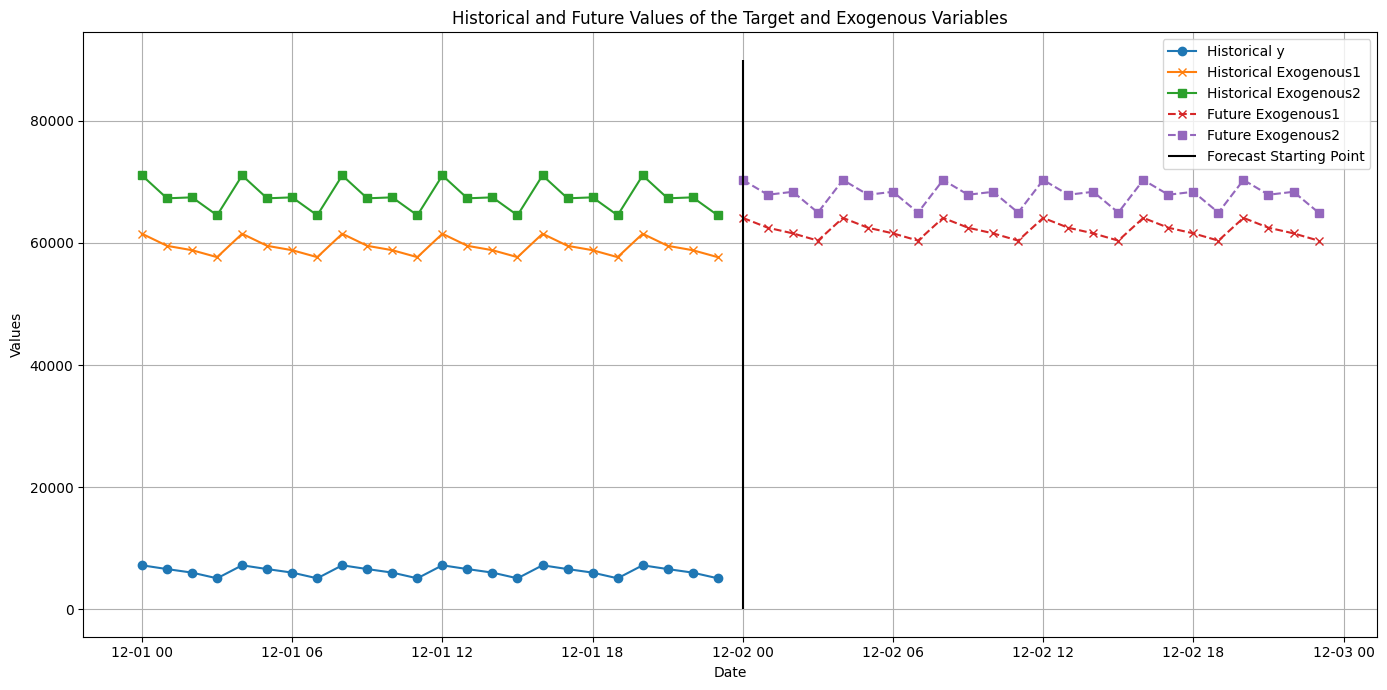

In [ ]:
#| echo: false
df = pd.DataFrame({
    'ds': pd.date_range(start='2016-12-01', periods=24, freq='H'),
    'y': 6 * (1_00 * np.array([72.00, 65.80, 59.99, 50.69])).tolist(),
    'Exogenous1': 6 * [61507.0, 59528.0, 58812.0, 57676.0],
    'Exogenous2': 6 * [71066.0, 67311.0, 67470.0, 64529.0]
})

# Sample future data
X_df = pd.DataFrame({
    'ds': pd.date_range(start='2016-12-02', periods=24, freq='H'),
    'Exogenous1': 6 * [64108.0, 62492.0, 61571.0, 60381.0],
    'Exogenous2': 6 * [70318.0, 67898.0, 68379.0, 64972.0]
})

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Historical y', marker='o')
plt.plot(df['ds'], df['Exogenous1'], label='Historical Exogenous1', marker='x')
plt.plot(df['ds'], df['Exogenous2'], label='Historical Exogenous2', marker='s')

# Plot the future data
plt.plot(X_df['ds'], X_df['Exogenous1'], label='Future Exogenous1', linestyle='--', marker='x')
plt.plot(X_df['ds'], X_df['Exogenous2'], label='Future Exogenous2', linestyle='--', marker='s')
plt.vlines(x = X_df['ds'].iloc[0], ymin=0, ymax=90_000, colors='black', label='Forecast Starting Point')

plt.title('Historical and Future Values of the Target and Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3. **TimeGPT:**
   When calling the `forecast` method, pass the historical dataframe (`df`), specify the horizon (`h`) for the forecast, and pass the future exogenous values `X_df`. The model will automatically consider the exogenous variables in `df` for the historical periods.

``` python
from nixtlats import TimeGPT
timegpt = TimeGPT()

# df is your historical dataframe including the target and exogenous variables
# X_df is your future dataframe with expected values for the exogenous variables
# h is the number of periods you want to forecast into the future
forecasted_values = timegpt.forecast(df=df, X_df=X_df, h=21)
```

#### Note on API Endpoint Usage

When using direct API endpoints (REST API calls), the approach differs slightly:

- **Unified Dataframe:** You must concatenate your historical and future exogenous variable data into one unified dataframe (`x`). This dataframe should contain both the past values used for training and the future values for which you want predictions.
  
- **API Payload Structure:** The API expects a payload where the target variable (`y`) and the unified exogenous variables (`x`) are passed separately.

- **Calling the API:** When making a REST API call, you will typically send a request to the API endpoint with the payload structured as described above.

Remember that while the SDK abstracts some of the complexities and can automatically handle different dataframes for historical and future values, the API endpoint requires a more manual approach to data preparation.

## Finetuning 

### What is finetuning? 

## Pricing and Billing 

### How does pricing work? 

`TimeGPT`'s cost is based on usage. Every call you make has a certain number of input, output, and finetune tokens associated with it. Price tiers are based on the number of tokens used, which you can find on your [dashboard](https://dashboard.nixtla.io/) under `Billing`. The cost per token decreases as you move up tiers. You'll pay the corresponding price for each segment of tokens used.

### Are there free credits or discounts? 

Upon signing up, all users recive $1000 USD in free credits. Once those credits are exhausted, you'll be asked to add a payment method to continue using `TimeGPT`. Costs are then calculated based on the number of tokens used and the price tiers. 

The pricing model was designed for production settings where pipelines have already been tested and established. However, if you need additional free credits for testing, or if you are using TimeGPT for academic purposes, please contact us at ops@nixtla.io to ask about eligibility for additional free credits or discounts. 

Free credits do not expire and can be used at any time.

### How are tokens counted? 

One token corresponds to one row of your dataset. Please refer to [TimeGPT Quickstart](https://nixtlaverse.nixtla.io/nixtla/docs/getting-started/getting_started_short.html#usage) and our tutorials to understand the data format required for each use case. For high-frequency data we recommend trimming the input whenever possible. For example, when working with minute-level data, consider trimming to the most recent hour. 

### How does billing work? 

Billing is done on the first five days of the month. We have partened with Stripe to handle all payment processing. You can view your invoices and payment history in your [dashboard](https://dashboard.nixtla.io/).


## Privacy and Security 

We take your privacy and security very seriously. Below, you can find our terms and conditions: 

- For the Python SDK, please review the [license agreement](https://github.com/Nixtla/nixtla/blob/main/LICENSE). 

- For `TimeGPT`, refer to our [terms and conditions](https://docs.nixtla.io/docs/terms-and-conditions). 

Additionally, we're developing a self-hosted version for enterprise data. This version is currently in beta, so contact us at ops@nixtla.io if you're interested in learning more.

## Troubleshooting

The following section contains some common errors and their solutions. 

### Error message: Invalid API key 

``` python
ApiError: status_code: 401, body: {'data': None, 'message': 'Invalid API key', 'details': 'Key not found', 'code': 'A12', 'requestID': 'E7F2BBTB2P', 'support': 'If you have questions or need support, please email ops@nixtla.io'}
```

**Solution:** This error occurs when your `TimeGPT` token is either invalid or has not been set up correctly. Please use the `validate_token` method to verify it or review it in the `API Keys` section of your [dashboard](https://dashboard.nixtla.io/).

### Error message: Too many requests 

``` python
ApiError: status_code: 429, body: {'data': None, 'message': 'Too many requests', 'details': 'You need to add a payment method to continue using the API, do so from https://dashboard.nixtla.io', 'code': 'A21', 'requestID': 'NCJDK7KSJ6', 'support': 'If you have questions or need support, please email ops@nixtla.io’}
```

**Solution:** This error occurs when you have exhausted your free credits and need to add a payment method to continue using `TimeGPT`. You can add a payment method in the `Billing` section of your [dashboard](https://dashboard.nixtla.io/).

## Additional Support

If you have any more questions or need support, please reach out by:

- Opening an [issue](https://github.com/Nixtla/nixtla/issues) on GitHub for technical questions or bugs.
- Sending an email to ops@nixtla.io for general inquiries or support.
- Joining our [Slack](https://join.slack.com/t/nixtlacommunity/shared_invite/zt-2ebtgjbip-QMSnvm6ED1NF5vi4xj_13Q) community to connect with other users and our team.